# Test de l'opérateur ProblemDiscontinuEnergieTemperature

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures", "EnergieTemperature/")
save_fig = True

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

In [3]:
n_lim = 10**8
t_fin_lim = 1.0

In [4]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
from copy import deepcopy

phy_prop_ref = deepcopy(phy_prop)
phy_prop_ref.v = 0.0

num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="quick", time_scheme="euler", cfl=0.5, Delta=0.02
)
num_prop_ref = NumericalProperties(
    dx=2. * 10**-5, schema="quick", time_scheme="rk3", cfl=0.5, Delta=0.02
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)

init_pbs = {"markers": markers, "phy_prop": phy_prop, "num_prop": num_prop}
init_pb_ref = {"markers": markers, "phy_prop": phy_prop_ref, "num_prop": num_prop_ref}


Energie température 
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
['References/Energie température , euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.000000.pkl', 'References/Energie température , euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.000699.pkl', 'References/Energie température , euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.000007.pkl', 'References/Energie température , euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.000014.pkl']
Loading ======> References/Energie température , euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.000014.pkl
remaining time to compute : 0.000001

Reference
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
['References/Reference, euler, quick, dx = 3.90625e-05, dt = 6.9e-06_t_0.000699.pkl', 'References/Reference, euler, quick, dx = 3.90625e-05, dt = 6.9e-06_t_0.000007.pkl', 'References/Reference, euler

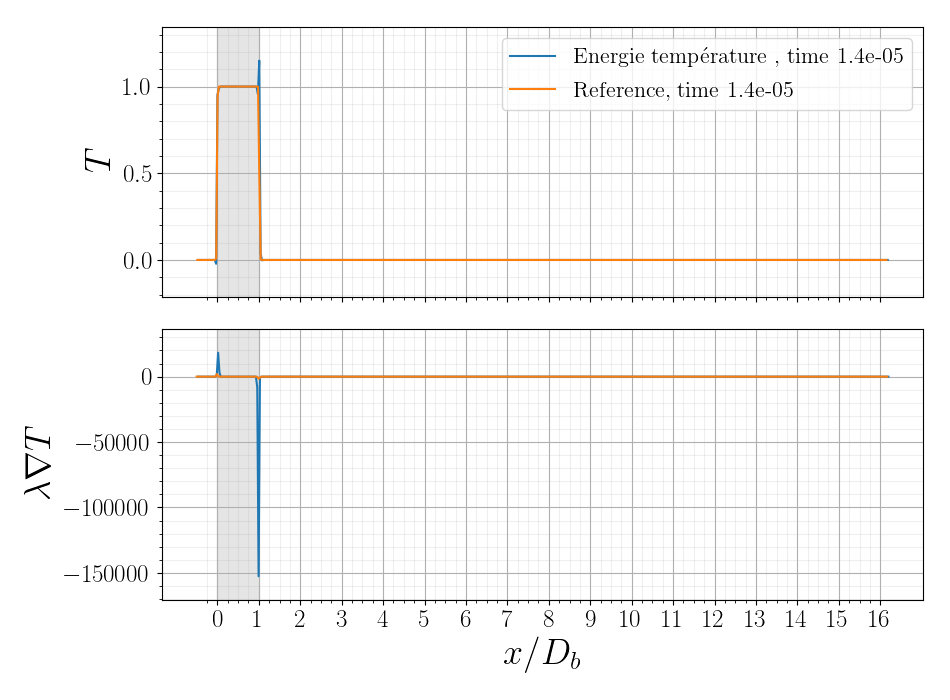

In [5]:
t_fin = 15e-6
plot = Plotter("decale", flux_conv=False, lda_gradT=True)

prob = ProblemDiscontinuEnergieTemperature(
    get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
)
t, e = prob.load_or_compute(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

prob_ref1 = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop, name='Reference'
)
t_ref, e_ref = prob_ref1.load_or_compute(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

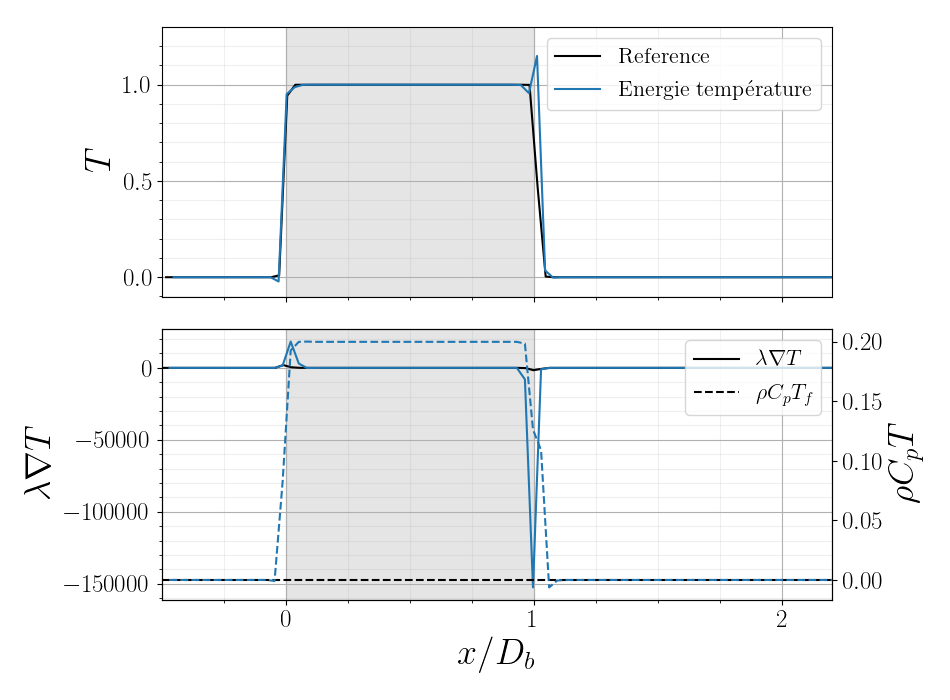

In [29]:
plotter_hT = Plotter('decale', time=False,lda_gradT=True, flux_conv=True, ispretty=True, zoom=(-0.5,2.2))

plotter_hT.plot(prob_ref1, c='k')
plotter_hT.ax.set_ylim(None,1.3)
plotter_hT.plot(prob)
plotter_hT.ax2.plot([],[], 'k', label=r'$\lambda\nabla T$')
plotter_hT.ax2.plot([],[], 'k--', label=r'$\rho C_p T_f$')
hd, lbs = plotter_hT.ax2.get_legend_handles_labels()
plotter_hT.ax2.legend(hd[-2:], lbs[-2:])
plotter_hT.ax3.set_ylabel(r'$\rho C_p T$',size='x-large')
plotter_hT.fig.tight_layout()
if save_fig:
    plotter_hT.fig.savefig(savefig_path+'temperature_hT_2dt.pdf')


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
['References/TOF, euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.499995.pkl', 'References/TOF, euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.199998.pkl', 'References/TOF, euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.249998.pkl', 'References/TOF, euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.319991.pkl', 'References/TOF, euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.349997.pkl']
Loading ======> References/TOF, euler, quick, dx = 3.90625e-05, dt = 6.9e-06, cfl = 0.0354224_t_0.199998.pkl
remaining time to compute : 0.000002

Énergie et TSV couplé
dt fourier
6.918433404737903e-06
Db / dx = 30
Liste des simus similaires : 
[]

Reference
dt fourier
1.8172585062055175e-06
Db / dx = 59
Liste des simus similaires : 
['References/Reference, rk3, quick, dx = 2.002e-05, dt = 1.8e-06_t_0.319997.pkl', 'References/Refe

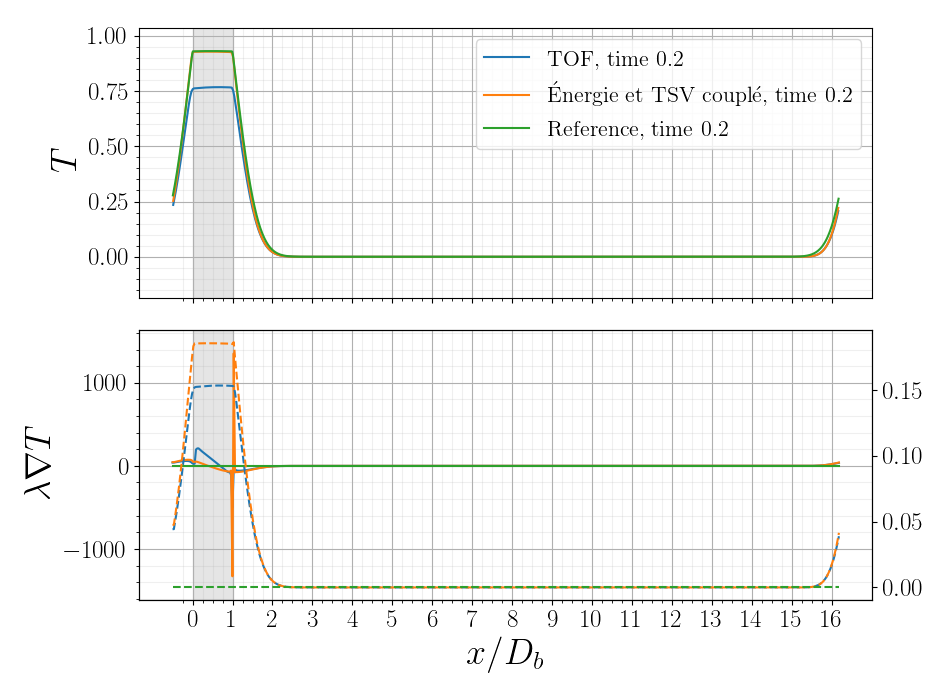

In [23]:
t_fin = 0.2
plot = Plotter("decale", flux_conv=True, lda_gradT=True)

prob_tof = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop
)
t, e = prob_tof.load_or_compute(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

prob_int = ProblemDiscontinuEnergieTemperatureInt(
    get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, name=r'Énergie et TSV couplé'
)

t, e = prob_int.load_or_compute(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

prob_ref = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop_ref, name='Reference'
)
t_ref, e_ref = prob_ref.load_or_compute(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)


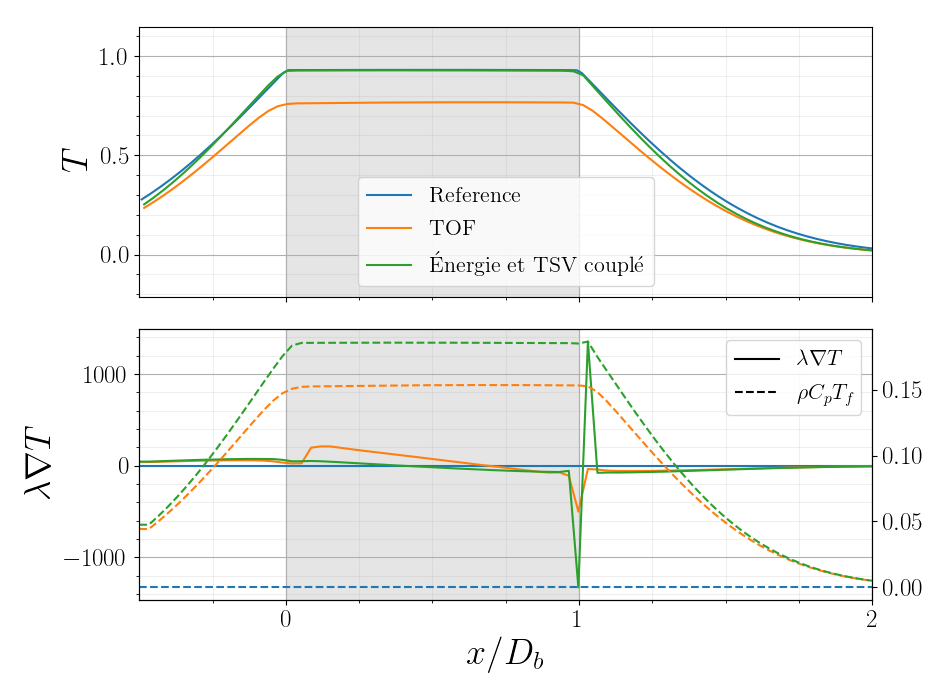

In [27]:
pt = Plotter('decale', time=False, ispretty=True, lda_gradT=True, flux_conv=True, zoom=(-0.5, 2))

pt.plot(prob_ref, label='Reference')
pt.plot(prob_tof)
pt.plot(prob_int, label='Énergie et TSV couplé')
pt.ax.legend(loc='best')
pt.ax2.plot([],[], 'k', label=r'$\lambda\nabla T$')
pt.ax2.plot([],[], 'k--', label=r'$\rho C_p T_f$')
hd, lbs = pt.ax2.get_legend_handles_labels()
pt.ax2.legend(hd[-2:], lbs[-2:])
pt.fig.tight_layout()
if save_fig:
    pt.fig.savefig(savefig_path + 'temperature_hTint_0.2s.pdf')


Reference
dE*/dt* = -2.54094e-09

TOF
===
dE*/dt* = -3.67052e-06

Énergie et TSV couplé
dE*/dt* = -3.02983e-07


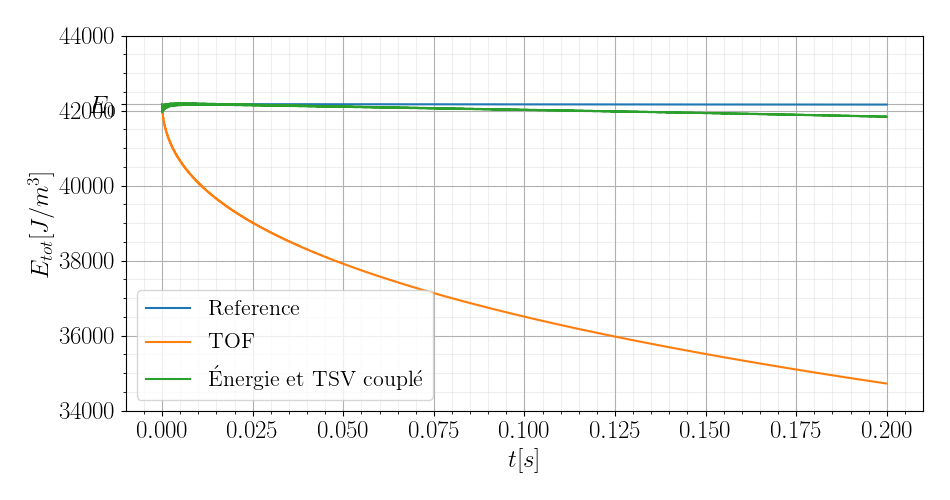

In [20]:
plot_en = EnergiePlot()

plot_en.plot_pb(prob_ref)
plot_en.plot_pb(prob_tof)
plot_en.plot_pb(prob_int)
plot_en.ax.legend(loc='lower left')
plot_en.add_E0()
if save_fig:
    plot_en.fig.savefig(savefig_path + 'energie_hTint.pdf')